In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns;
from scipy.spatial import distance
from sklearn.preprocessing import StandardScaler
import time
import math

sns.set()  # for plot styling
import numpy as np
from collections import defaultdict

from numpy import dot
from numpy.linalg import norm

In [ ]:
def lineToTuple(line):
    # remove leading/trailing witespace and newlines
    cleanLine = line.strip()
    # get rid of quotes
    cleanLine = cleanLine.replace('"', '')
    # separate the fields
    lineList = cleanLine.split(",")
    # convert strings into numbers
    stringsToNumbers(lineList)
    lineTuple = tuple(lineList)
    return lineTuple

In [ ]:
def stringsToNumbers(myList):
    for i in range(len(myList)):
        if (isValidNumberString(myList[i])):
            myList[i] = float(myList[i])


In [ ]:
def isValidNumberString(s):
  if len(s) == 0:
    return False
  if  len(s) > 1 and s[0] == "-":
      s = s[1:]
  for c in s:
    if c not in "0123456789.":
      return False
  return True

In [ ]:
data = [
    [3, 5],
    [3, 4],
    [2, 8],
    [2, 3],
    [6, 2],
    [6, 4],
    [7, 3],
    [7, 4],
    [8, 5],
    [7, 6]
]

In [ ]:
def loadCSV(fileName):
    fileHandler = open(fileName, "rt")
    lines = fileHandler.readlines()
    fileHandler.close()
    del lines[0]  # remove the header
    dataset = []
    for line in lines:
        instance = lineToTuple(line)
        dataset.append(instance)
    return dataset

In [ ]:
def euclidean_distance(point1, point2):
    distance = 0
    for a,b in zip(point1, point2):
        distance += pow((a-b), 2)
    return math.sqrt(distance)

In [ ]:
def manhattan_distance(point1, point2):
    distance = 0
    for a,b in zip(point1, point2):
        distance += abs(a-b)
    return distance

In [ ]:
def cosine_similarity(point1, point2):
  A = np.array(point1)
  B = np.array(point2)
  dist = 1 - np.dot(A,B)/(np.linalg.norm(A)*np.linalg.norm(B))
  return dist

In [ ]:
def jaccard(A, B):
    return 1 - (np.sum(np.minimum(A,B), axis = 0)/np.sum(np.maximum(A, B), axis = 0)) 

In [ ]:
def calculate_centroid(cluster):
  n = len(cluster[0])
  if isinstance(cluster[0][-1], str):
    centroid = [0]*(n-1)

    for i in range(n-1):
      for point in cluster:
        centroid[i] += point[i]
      centroid[i] = centroid[i]/len(cluster)
  else:
    centroid = [0]*n

    for i in range(n):
      for point in cluster:
        centroid[i] += point[i]
      centroid[i] = centroid[i]/len(cluster)

  
  return centroid

In [ ]:
def draw_nd_scatter(clusters, centroid_centers):
  for key in clusters:
    x = []
    y = []
    cluster = clusters[key]
    for c in cluster:
      x.append(c[0])
      y.append(c[1])
    plt.scatter(x, y, marker='o')

  for point in centroid_centers:
    plt.scatter(point[0], point[1], marker='+')
  
  plt.show()

In [ ]:
def label_cluster(cluster):
  cl = defaultdict(int)
  for point in cluster:
    cl[point[-1]] += 1
  return cl

In [ ]:
original_labels = dict(label_cluster(iris_data))

In [554]:
class KMeans:
  def __init__(self, n_clusters=3, max_iters=300, init_centroids=None, d_func=euclidean_distance, show_sse=False, show_first_centroid=False, centroid_stop=True):
    self.n_clusters = n_clusters
    self.max_iters = max_iters
    self.init_centroids = init_centroids
    self.d_func = d_func
    self.sse_list = []
    self.show_first_centroid = show_first_centroid
    self.show_sse = show_sse
    self.centroid_stop = centroid_stop

  def fit(self, data):
    start = time.time()
    if self.init_centroids is None:
      # Assign random points of data as centroids of size k (n_clusters)
      random_choice = np.random.choice(range(len(data)), self.n_clusters, replace=False)
      centroids = []

      for choice in random_choice:
        if isinstance(data[choice][-1], str):
          centroids.append(data[choice][:-1])
        else:
          centroids.append(data[choice])
      
      self.init_centroids = centroids
    
    for loop in range(self.max_iters): 
      clusters = defaultdict(list)
      sse = 0
      # Now, assign each point to nearest centroid cluster

      for point in data:
        temp_centroid = -1
        min_dist = 99999999
        for i, centroid in enumerate(self.init_centroids):
          if isinstance(point[-1], str):
            d = self.d_func(point[:-1], centroid)
          else:
            d = self.d_func(point, centroid)
          if d < min_dist:
            temp_centroid = i
            min_dist = d
        
        clusters[temp_centroid].append(point)

      prev_centroids = self.init_centroids.copy()
      # Now, recalculating the centroids
      for key in clusters.keys():
        cluster = clusters[key]
        self.init_centroids[key] = calculate_centroid(cluster)

      if loop == 1 and self.show_first_centroid == True:
        print("Centroids after first iteration: ", self.init_centroids)

      if self.centroid_stop == True and self.init_centroids == prev_centroids:
        break

      # Now, calculate SSE
      for key in clusters.keys():
        cluster = clusters[key]
        ce = self.init_centroids[key]

        for p in cluster:
          sse += euclidean_distance(ce, p)

      if self.show_sse == True and loop > 1 and self.sse_list[-1] <= sse:
        self.sse_list.pop()
        break

      self.sse_list.append(sse)

    print("Time taken:", time.time() - start)
    print("Number of iterations:", loop)
    return [self.init_centroids, clusters]


Task 1: Question 1

Centroids after first iteration:  [[4.0, 6.333333333333333], [5.571428571428571, 3.5714285714285716]]
Time taken: 0.001031637191772461
Number of iterations: 1
Final Cluster 1 : [[3, 5], [2, 8], [7, 6]]
Final Cluster 2 : [[3, 4], [2, 3], [6, 2], [6, 4], [7, 3], [7, 4], [8, 5]]


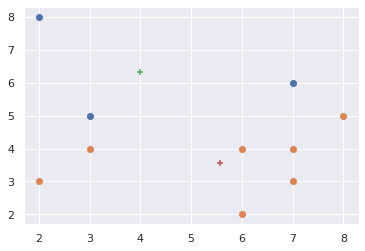

In [ ]:
kmeans = KMeans(n_clusters=2, init_centroids=[[4, 6],[5, 4]], d_func=manhattan_distance, show_first_centroid=True)
[centroid_centers, clusters] = kmeans.fit(data)

for key in clusters:
  print("Final Cluster", key+1, ":", clusters[key])

draw_nd_scatter(clusters, centroid_centers)

Task 1: Question 2

Time taken: 0.0002262592315673828
Number of iterations: 2
Final Cluster 1 : [[3, 5], [3, 4], [2, 8], [2, 3]]
Final Cluster 2 : [[6, 2], [6, 4], [7, 3], [7, 4], [8, 5], [7, 6]]


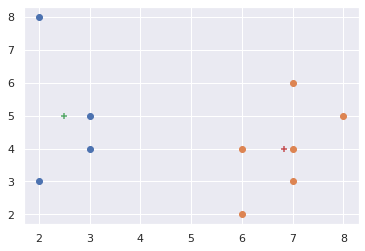

[19.699965039247633, 14.444951661105069]


In [ ]:
kmeans = KMeans(n_clusters=2, init_centroids=[[4, 6],[5, 4]], d_func=euclidean_distance)
[centroid_centers, clusters] = kmeans.fit(data)

for key in clusters:
  print("Final Cluster", key+1, ":", clusters[key])

draw_nd_scatter(clusters, centroid_centers)
print(kmeans.sse_list)

 Task 1: Question 3

Centroids after first iteration:  [[2.5, 5.0], [6.833333333333333, 4.0]]
Time taken: 0.0010211467742919922
Number of iterations: 1
Final Cluster 1 : [[3, 5], [3, 4], [2, 8], [2, 3]]
Final Cluster 2 : [[6, 2], [6, 4], [7, 3], [7, 4], [8, 5], [7, 6]]


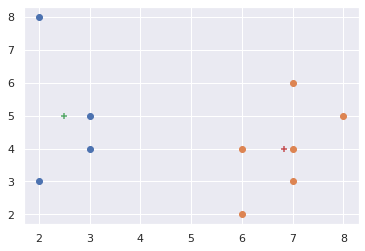

In [ ]:
kmeans = KMeans(n_clusters=2, init_centroids=[[3, 3], [8, 3]], d_func=manhattan_distance, show_first_centroid=True)
[centroid_centers, clusters] = kmeans.fit(data)

for key in clusters:
  print("Final Cluster", key+1, ":", clusters[key])

draw_nd_scatter(clusters, centroid_centers)

Task 1: Question 4

Centroids after first iteration:  [[4.857142857142857, 3.5714285714285716], [5.666666666666667, 6.333333333333333]]
Time taken: 0.0008599758148193359
Number of iterations: 1
Final Cluster 1 : [[3, 5], [3, 4], [2, 3], [6, 2], [6, 4], [7, 3], [7, 4]]
Final Cluster 2 : [[2, 8], [8, 5], [7, 6]]


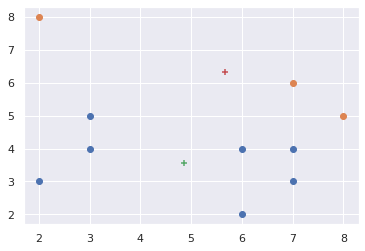

In [ ]:
kmeans = KMeans(n_clusters=2, init_centroids=[[3, 2], [4, 8]], d_func=manhattan_distance, show_first_centroid=True)
[centroid_centers, clusters] = kmeans.fit(data)

for key in clusters:
  print("Final Cluster", key+1, ":", clusters[key])

draw_nd_scatter(clusters, centroid_centers)

Task 2:

In [ ]:
!wget https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data

--2021-03-15 01:58:53--  https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data
Resolving archive.ics.uci.edu (archive.ics.uci.edu)... 128.195.10.252
Connecting to archive.ics.uci.edu (archive.ics.uci.edu)|128.195.10.252|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 4551 (4.4K) [application/x-httpd-php]
Saving to: ‘iris.data.3’

iris.data.3         100%[===================>]   4.44K  --.-KB/s    in 0s      

2021-03-15 01:58:53 (132 MB/s) - ‘iris.data.3’ saved [4551/4551]



In [ ]:
raw_iris_data = loadCSV('iris.data')

In [ ]:
iris_data = []
del raw_iris_data[-1]

for row in raw_iris_data:
  iris_data.append([
    row[0],
    row[1],
    row[2],
    row[3],
    row[4]
  ])

print(iris_data)

[[4.9, 3.0, 1.4, 0.2, 'Iris-setosa'], [4.7, 3.2, 1.3, 0.2, 'Iris-setosa'], [4.6, 3.1, 1.5, 0.2, 'Iris-setosa'], [5.0, 3.6, 1.4, 0.2, 'Iris-setosa'], [5.4, 3.9, 1.7, 0.4, 'Iris-setosa'], [4.6, 3.4, 1.4, 0.3, 'Iris-setosa'], [5.0, 3.4, 1.5, 0.2, 'Iris-setosa'], [4.4, 2.9, 1.4, 0.2, 'Iris-setosa'], [4.9, 3.1, 1.5, 0.1, 'Iris-setosa'], [5.4, 3.7, 1.5, 0.2, 'Iris-setosa'], [4.8, 3.4, 1.6, 0.2, 'Iris-setosa'], [4.8, 3.0, 1.4, 0.1, 'Iris-setosa'], [4.3, 3.0, 1.1, 0.1, 'Iris-setosa'], [5.8, 4.0, 1.2, 0.2, 'Iris-setosa'], [5.7, 4.4, 1.5, 0.4, 'Iris-setosa'], [5.4, 3.9, 1.3, 0.4, 'Iris-setosa'], [5.1, 3.5, 1.4, 0.3, 'Iris-setosa'], [5.7, 3.8, 1.7, 0.3, 'Iris-setosa'], [5.1, 3.8, 1.5, 0.3, 'Iris-setosa'], [5.4, 3.4, 1.7, 0.2, 'Iris-setosa'], [5.1, 3.7, 1.5, 0.4, 'Iris-setosa'], [4.6, 3.6, 1.0, 0.2, 'Iris-setosa'], [5.1, 3.3, 1.7, 0.5, 'Iris-setosa'], [4.8, 3.4, 1.9, 0.2, 'Iris-setosa'], [5.0, 3.0, 1.6, 0.2, 'Iris-setosa'], [5.0, 3.4, 1.6, 0.4, 'Iris-setosa'], [5.2, 3.5, 1.5, 0.2, 'Iris-setosa'], 

Questions 1,2,3:

Time taken: 0.009361743927001953
Number of iterations: 7


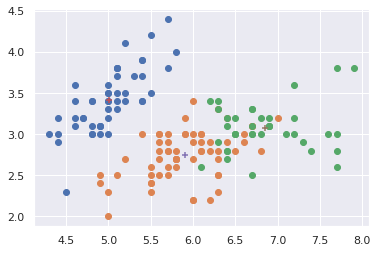

SSE = [209.99348448813492, 154.51767841662937, 116.38686467742477, 104.56644763755908, 98.7779016487441, 97.59007956128406, 97.17547683463661]
Original Labels:  {'Iris-setosa': 49, 'Iris-versicolor': 50, 'Iris-virginica': 50}
Predicted Labels:  {'Iris-setosa': 49, 'Iris-versicolor': 48, 'Iris-virginica': 36}
Accuracy = 0.8926174496644296


In [ ]:
kmeans = KMeans()
[centroid_centers, clusters] = kmeans.fit(iris_data)

labels = {'Iris-setosa': 0, 'Iris-versicolor': 0, 'Iris-virginica': 0}

for key in clusters:
  d = dict(label_cluster(clusters[key]))
  mx = 0
  s = 0
  label = ""
  for k in d:
    s += d[k]
    if d[k] > mx:
      mx = d[k]
      label = k
  labels[label] = mx

draw_nd_scatter(clusters, centroid_centers)

print("SSE =",kmeans.sse_list)
print("Original Labels: ", original_labels)
print("Predicted Labels: ", labels)

total = 0
mismatch = 0

for l in original_labels:
  total += original_labels[l]
  mismatch += abs(original_labels[l] - labels[l])

accuracy = (total - mismatch) / total

print("Accuracy =",accuracy)

Time taken: 0.054117679595947266
Number of iterations: 5


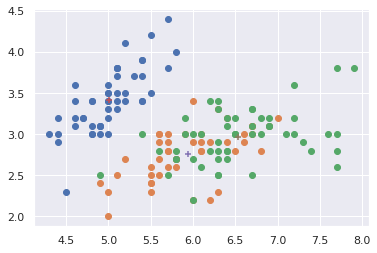

SSE = [214.39032159916616, 109.12522334342043, 104.81251459786179, 101.3500201009001, 101.42234214063515]
Original Labels:  {'Iris-setosa': 49, 'Iris-versicolor': 50, 'Iris-virginica': 50}
Predicted Labels:  {'Iris-setosa': 49, 'Iris-versicolor': 46, 'Iris-virginica': 50}
Accuracy = 0.9731543624161074


In [ ]:
kmeans = KMeans(d_func=cosine_similarity)
[centroid_centers, clusters] = kmeans.fit(iris_data)

labels = {'Iris-setosa': 0, 'Iris-versicolor': 0, 'Iris-virginica': 0}

for key in clusters:
  d = dict(label_cluster(clusters[key]))
  mx = 0
  s = 0
  label = ""
  for k in d:
    s += d[k]
    if d[k] > mx:
      mx = d[k]
      label = k
  labels[label] = mx

draw_nd_scatter(clusters, centroid_centers)

print("SSE =",kmeans.sse_list)
print("Original Labels: ", original_labels)
print("Predicted Labels: ", labels)

total = 0
mismatch = 0

for l in original_labels:
  total += original_labels[l]
  mismatch += abs(original_labels[l] - labels[l])

accuracy = (total - mismatch) / total

print("Accuracy =",accuracy)

Time taken: 0.06517171859741211
Number of iterations: 4


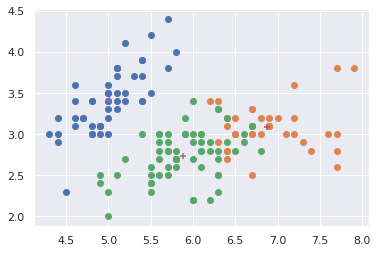

SSE = [138.9550600521786, 100.56628352976807, 97.30122458977715, 97.33688011669413]
Original Labels:  {'Iris-setosa': 49, 'Iris-versicolor': 50, 'Iris-virginica': 50}
Predicted Labels:  {'Iris-setosa': 49, 'Iris-versicolor': 47, 'Iris-virginica': 35}
Accuracy = 0.8791946308724832


In [ ]:
kmeans = KMeans(d_func=jaccard)
[centroid_centers, clusters] = kmeans.fit(iris_data)

labels = {'Iris-setosa': 0, 'Iris-versicolor': 0, 'Iris-virginica': 0}

for key in clusters:
  d = dict(label_cluster(clusters[key]))
  mx = 0
  s = 0
  label = ""
  for k in d:
    s += d[k]
    if d[k] > mx:
      mx = d[k]
      label = k
  labels[label] = mx

draw_nd_scatter(clusters, centroid_centers)

print("SSE =",kmeans.sse_list)
print("Original Labels: ", original_labels)
print("Predicted Labels: ", labels)

total = 0
mismatch = 0

for l in original_labels:
  total += original_labels[l]
  mismatch += abs(original_labels[l] - labels[l])

accuracy = (total - mismatch) / total

print("Accuracy =",accuracy)

Question 4:

1st Stopping Criteria: No Change in Centroids

Euclidean Distance:

In [569]:
kmeans = KMeans(centroid_stop=True)
[centroid_centers, clusters] = kmeans.fit(iris_data)
print(kmeans.sse_list)

Time taken: 0.005180835723876953
Number of iterations: 2
[97.86327423335617, 97.17547683463661]


Cosine Similarity:

In [570]:
kmeans = KMeans(centroid_stop=True, d_func=cosine_similarity)
[centroid_centers, clusters] = kmeans.fit(iris_data)
print(kmeans.sse_list)

Time taken: 0.0445253849029541
Number of iterations: 4
[206.6504441430445, 105.12206117746264, 101.73838380909245, 101.42234214063515]


Jaccard's Similarity:

In [571]:
kmeans = KMeans(centroid_stop=True, d_func=jaccard)
[centroid_centers, clusters] = kmeans.fit(iris_data)
print(kmeans.sse_list)

Time taken: 0.030404329299926758
Number of iterations: 2
[97.83210577677956, 98.19939498657202]


2nd Stopping Criteria: Increase in SSE

Euclidean:

In [576]:
kmeans = KMeans(show_sse=True)
[centroid_centers, clusters] = kmeans.fit(iris_data)
print(kmeans.sse_list)

Time taken: 0.016068458557128906
Number of iterations: 10
[109.84537351745865, 100.80175394226012, 98.773416323733, 98.19480054362994, 97.98997349838257, 97.72543409685119, 97.49091101754188, 97.36328582285084, 97.22367033834894]


Cosine Similarity:

In [592]:
kmeans = KMeans(show_sse=True, d_func=cosine_similarity)
[centroid_centers, clusters] = kmeans.fit(iris_data)
print(kmeans.sse_list)

Time taken: 0.02695751190185547
Number of iterations: 2
[127.24761092582776]


Jaccard's Similarity:

In [597]:
kmeans = KMeans(show_sse=True, d_func=jaccard)
[centroid_centers, clusters] = kmeans.fit(iris_data)
print(kmeans.sse_list)

Time taken: 0.05254769325256348
Number of iterations: 4
[126.20421632096509, 123.96740634235528, 122.93255898101911, 122.64777522886338]


3rd Stopping Criteria: Max Iterations Complete

Euclidean:

In [605]:
kmeans = KMeans(max_iters=101, show_sse=False, centroid_stop=False)
[centroid_centers, clusters] = kmeans.fit(iris_data)
print(kmeans.sse_list)

Time taken: 0.10790896415710449
Number of iterations: 100
[120.17288607017348, 108.4925153415002, 100.42732794375446, 98.55290416677242, 98.06919988468795, 97.8980435758209, 97.6590012749786, 97.49091101754188, 97.36328582285084, 97.22367033834894, 97.08179358885708, 97.19577229449335, 97.19577229449335, 97.19577229449335, 97.19577229449335, 97.19577229449335, 97.19577229449335, 97.19577229449335, 97.19577229449335, 97.19577229449335, 97.19577229449335, 97.19577229449335, 97.19577229449335, 97.19577229449335, 97.19577229449335, 97.19577229449335, 97.19577229449335, 97.19577229449335, 97.19577229449335, 97.19577229449335, 97.19577229449335, 97.19577229449335, 97.19577229449335, 97.19577229449335, 97.19577229449335, 97.19577229449335, 97.19577229449335, 97.19577229449335, 97.19577229449335, 97.19577229449335, 97.19577229449335, 97.19577229449335, 97.19577229449335, 97.19577229449335, 97.19577229449335, 97.19577229449335, 97.19577229449335, 97.19577229449335, 97.19577229449335, 97.1957722

Cosine Similarity:

In [606]:
kmeans = KMeans(max_iters=101, show_sse=False, centroid_stop=False, d_func=cosine_similarity)
[centroid_centers, clusters] = kmeans.fit(iris_data)
print(kmeans.sse_list)

Time taken: 0.7465636730194092
Number of iterations: 100
[114.61590286716502, 106.74453015403373, 103.40166481975079, 102.26916147701174, 102.26916147701174, 102.26916147701174, 102.26916147701174, 102.26916147701174, 102.26916147701174, 102.26916147701174, 102.26916147701174, 102.26916147701174, 102.26916147701174, 102.26916147701174, 102.26916147701174, 102.26916147701174, 102.26916147701174, 102.26916147701174, 102.26916147701174, 102.26916147701174, 102.26916147701174, 102.26916147701174, 102.26916147701174, 102.26916147701174, 102.26916147701174, 102.26916147701174, 102.26916147701174, 102.26916147701174, 102.26916147701174, 102.26916147701174, 102.26916147701174, 102.26916147701174, 102.26916147701174, 102.26916147701174, 102.26916147701174, 102.26916147701174, 102.26916147701174, 102.26916147701174, 102.26916147701174, 102.26916147701174, 102.26916147701174, 102.26916147701174, 102.26916147701174, 102.26916147701174, 102.26916147701174, 102.26916147701174, 102.26916147701174, 10

Jaccard's Similarity:

In [607]:
kmeans = KMeans(max_iters=101, show_sse=False, centroid_stop=False, d_func=jaccard)
[centroid_centers, clusters] = kmeans.fit(iris_data)
print(kmeans.sse_list)

Time taken: 0.9442977905273438
Number of iterations: 100
[98.63650964712818, 97.27416790992994, 97.58049878656786, 97.53663742645342, 97.33688011669413, 97.33688011669413, 97.33688011669413, 97.33688011669413, 97.33688011669413, 97.33688011669413, 97.33688011669413, 97.33688011669413, 97.33688011669413, 97.33688011669413, 97.33688011669413, 97.33688011669413, 97.33688011669413, 97.33688011669413, 97.33688011669413, 97.33688011669413, 97.33688011669413, 97.33688011669413, 97.33688011669413, 97.33688011669413, 97.33688011669413, 97.33688011669413, 97.33688011669413, 97.33688011669413, 97.33688011669413, 97.33688011669413, 97.33688011669413, 97.33688011669413, 97.33688011669413, 97.33688011669413, 97.33688011669413, 97.33688011669413, 97.33688011669413, 97.33688011669413, 97.33688011669413, 97.33688011669413, 97.33688011669413, 97.33688011669413, 97.33688011669413, 97.33688011669413, 97.33688011669413, 97.33688011669413, 97.33688011669413, 97.33688011669413, 97.33688011669413, 97.33688011

Task 3:

In [ ]:
red = [(4.7, 3.2), (4.9, 3.1), (5.0, 3.0), (4.6, 2.9)]
blue = [(5.9, 3.2), (6.7, 3.1), (6.0, 3.0), (6.2, 2.8)]

dists = []
d = 0
for r in red:
    for b in blue:
        dists.append([euclidean_distance(r, b), [r, b]])
        d += dists[-1][0]

dists.sort()

print("Q1: Distance between closest points is {:.4f} between points {} and {}".format(dists[0][0], dists[0][1][0], dists[0][1][1]))
print("Q2: Distance between farthest points is {:.4f} between points {} and {}".format(dists[-1][0], dists[-1][1][0], dists[-1][1][1]))
print("Q3: Average of all distances is {:.4f}".format(d/len(dists)))

Q1: Distance between closest points is 0.9220 between points (5.0, 3.0) and (5.9, 3.2)
Q2: Distance between farthest points is 2.1095 between points (4.6, 2.9) and (6.7, 3.1)
Q3: Average of all distances is 1.4129


If even intra-cluster points' distances are considered, then

In [ ]:
points = [(4.7, 3.2), (4.9, 3.1), (5.0, 3.0), (4.6, 2.9), (5.9, 3.2), (6.7, 3.1), (6.0, 3.0), (6.2, 2.8)]

new_dists = []
d = 0
for i in range(len(points)):
  for j in range(len(points)):
    if i != j:
      new_dists.append([euclidean_distance(points[i], points[j]), [points[i], points[j]]])
      d += new_dists[-1][0]

new_dists.sort()

print("Q1: Distance between closest points is {:.4f} between points {} and {}".format(new_dists[0][0], new_dists[0][1][0], new_dists[0][1][1]))
print("Q2: Distance between farthest points is {:.4f} between points {} and {}".format(new_dists[-1][0], new_dists[-1][1][0], new_dists[-1][1][1]))
print("Q3: Average of all distances is {:.4f}".format(d/len(new_dists)))

Q1: Distance between closest points is 0.1414 between points (4.9, 3.1) and (5.0, 3.0)
Q2: Distance between farthest points is 2.1095 between points (6.7, 3.1) and (4.6, 2.9)
Q3: Average of all distances is 0.9830
